In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import tensorflow as tf

In [4]:
from tensorflow.keras.models import Sequential

In [111]:
from tensorflow.keras.layers import Input, Dense, StringLookup

In [6]:
from tensorflow.keras.utils import to_categorical

In [7]:
from sklearn.model_selection import train_test_split

In [29]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [53]:
from string import punctuation

In [77]:
from sklearn.feature_extraction.text import CountVectorizer

In [125]:
from sklearn.preprocessing import LabelEncoder

In [173]:
import matplotlib.pyplot as plt

In [195]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [31]:
nltk.download('punkt') # Necessário para word_tokenize
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anton\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anton\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [49]:
palavras_remover = set(stopwords.words())
len(palavras_remover)

9895

In [8]:
df = pd.read_csv("../../../dados/nlp/news_sentiment_analysis.csv", encoding="utf-8")

In [19]:
df["Type"].unique()

array(['Business', 'Entertainment', 'General', 'Health', 'Science',
       'Sports', 'Technology'], dtype=object)

In [39]:
texto = df["Description"][0]
texto

'ST. GEORGE — Kaitlyn Larson, a first-year teacher at Pine View High School, recently received the Best in State award for a business leadership course. Larson’s students in grades 10-12 had the highest passing rate on the YouScience exam during the spring and fall semesters of 2023. The YouScience exam is similar to final exams [&#8230;]'

In [79]:
def limpar_texto( texto ):
    translator = str.maketrans('—’', '  ', punctuation)
    texto_limpo = texto.lower().translate( translator )
    tokens = word_tokenize(texto_limpo)
    tokens_limpos = []
    for token in tokens:
        if token not in palavras_remover:
            tokens_limpos.append(token)
    return " ".join(tokens_limpos)

In [81]:
df["CleanText"] = df["Description"].apply( limpar_texto )

In [83]:
df.head()

,Source,Author,Title,Description,URL,Published At,Sentiment,Type,CleanText
0,stgnews,Bridger Palmer,Pine View High teacher wins Best in State awar...,"ST. GEORGE — Kaitlyn Larson, a first-year teac...",https://www.stgeorgeutah.com/news/archive/2024...,2024-07-12T23:45:25+00:00,positive,Business,st george kaitlyn larson firstyear teacher pin...
1,Zimbabwe Mail,Staff Reporter,Businesses Face Financial Strain Amid Liquidit...,"Harare, Zimbabwe – Local businesses are grappl...",https://www.thezimbabwemail.com/business/busin...,2024-07-12T22:59:42+00:00,neutral,Business,harare zimbabwe – local businesses grappling s...
2,4-traders,NaN,Musk donates to super pac working to elect Tru...,(marketscreener.com) Billionaire Elon Musk has...,https://www.marketscreener.com/business-leader...,2024-07-12T22:52:55+00:00,positive,Business,marketscreenercom billionaire elon musk donate...
3,4-traders,NaN,US FTC issues warning to franchisors over unfa...,(marketscreener.com) A U.S. trade regulator on...,https://www.marketscreener.com/quote/stock/MCD...,2024-07-12T22:41:01+00:00,negative,Business,marketscreenercom trade regulator fridayannoun...
4,PLANET,NaN,Rooftop solar's dark side,4.5 million households in the U.S. have solar ...,https://www.npr.org/2024/07/12/1197961036/roof...,2024-07-12T22:28:19+00:00,positive,Business,45 million households solar panels homes custo...


In [95]:
MAX_PALAVRAS = 1000
vectorizer = CountVectorizer( max_features = MAX_PALAVRAS, binary = True)

In [97]:
bow_denso = vectorizer.fit_transform( df["CleanText"] )
vocabulario = vectorizer.get_feature_names_out()

In [101]:
X = pd.DataFrame.sparse.from_spmatrix(  bow_denso, columns=vocabulario )

In [105]:
df["Type"].unique()

array(['Business', 'Entertainment', 'General', 'Health', 'Science',
       'Sports', 'Technology'], dtype=object)

In [163]:
le = LabelEncoder()
type_encoded = le.fit_transform( df["Type"] )
Y = to_categorical(type_encoded, num_classes=7).astype(np.float32)
Y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [121]:
# data = tf.constant(df["Type"])
# lookup_layer = StringLookup()
# lookup_layer.adapt(data)
# # print(f"Vocabulary: {lookup_layer.get_vocabulary()}")
# resultado = lookup_layer(data)
# resultado.shape

TensorShape([3500])

In [135]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, random_state = 100 )

In [137]:
modelo = Sequential()
modelo.add( Input( (1000,) ) )
modelo.add( Dense( 256, activation="relu" ) )
modelo.add( Dense( 32, activation="relu" ) )
modelo.add( Dense( 7, activation="softmax" ) )
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         256,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 264,711 (1.01 MB)

 Trainable params: 264,711 (1.01 MB)

 Non-trainable params: 0 (0.00 B)

In [139]:
modelo.compile( optimizer="adam", loss="categorical_crossentropy", metrics=["Accuracy"] )

In [157]:
X_train.astype(np.int32).shape

(2625, 1000)

In [167]:
historico = modelo.fit( X_train.astype(np.int32), Y_train, epochs=20, batch_size=32 )

Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - Accuracy: 0.4955 - loss: 1.6531
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Accuracy: 0.9065 - loss: 0.4218
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - Accuracy: 0.9396 - loss: 0.2138
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Accuracy: 0.9528 - loss: 0.1697
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - Accuracy: 0.9526 - loss: 0.1534
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Accuracy: 0.9552 - loss: 0.1257
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - Accuracy: 0.9577 - loss: 0.1374
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - Accuracy: 0.9529 - loss: 0.1401
Epoch 9/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Accuracy: 0.9525 - loss: 0.1213
Epoch 10/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Accuracy: 0.9597 - loss: 0.1138
Epoch 11/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Accuracy: 0.9655 - loss: 0.0997
Epoch 12/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Accuracy: 0.9538 - l

In [171]:
historico.history

{'Accuracy': [0.6693333387374878,
  0.9028571248054504,
  0.9325714111328125,
  0.9508571624755859,
  0.9539047479629517,
  0.9523809552192688,
  0.954285740852356,
  0.9497143030166626,
  0.9523809552192688,
  0.955047607421875,
  0.954285740852356,
  0.9500952363014221,
  0.954285740852356,
  0.9561904668807983,
  0.954285740852356,
  0.9596190452575684,
  0.9558095335960388,
  0.9508571624755859,
  0.9535238146781921,
  0.9565714001655579],
 'loss': [1.3104630708694458,
  0.38141170144081116,
  0.22207549214363098,
  0.17410007119178772,
  0.15525639057159424,
  0.14231622219085693,
  0.14126160740852356,
  0.13515682518482208,
  0.13013902306556702,
  0.12113233655691147,
  0.1212911307811737,
  0.13929912447929382,
  0.11480613797903061,
  0.10505426675081253,
  0.10949473083019257,
  0.09885311126708984,
  0.10248962789773941,
  0.11893073469400406,
  0.0986664891242981,
  0.0944620817899704]}

In [181]:
acuracia = historico.history["Accuracy"]
perda = historico.history["loss"]
acuracia_norm = acuracia / np.max(acuracia)
perda_norm = perda / np.max(perda)

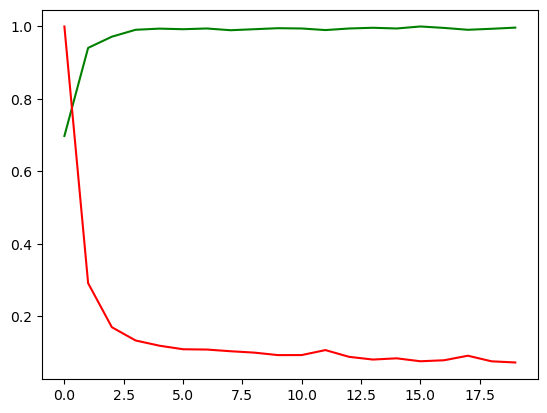

In [183]:
plt.plot(acuracia_norm, color="green")
plt.plot(perda_norm, color="red")

In [187]:
modelo.evaluate( X_test.astype(np.int32), Y_test )

28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - Accuracy: 0.8761 - loss: 0.4656


[0.4969657361507416, 0.8628571629524231]

In [189]:
Y_pred = modelo.predict( X_test.astype(np.int32) )

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


In [191]:
Y_pred

array([[1.29913120e-03, 1.31613389e-02, 9.68023956e-01, ...,
        9.76672280e-04, 1.39926402e-02, 7.78359186e-04],
       [5.52738697e-07, 1.71648207e-05, 1.99547594e-06, ...,
        1.15039974e-07, 9.99980092e-01, 9.02468429e-08],
       [9.15282522e-04, 1.23893751e-05, 9.98571992e-01, ...,
        3.56288297e-08, 2.83331377e-04, 1.16558760e-04],
       ...,
       [2.70654855e-04, 1.63502304e-03, 9.96974111e-01, ...,
        1.16577525e-04, 3.10939824e-04, 4.79568407e-04],
       [8.61302838e-02, 3.29243511e-01, 1.01104431e-01, ...,
        1.15374759e-01, 2.85387695e-01, 3.90040763e-02],
       [1.91439851e-03, 3.89277993e-04, 3.28555354e-04, ...,
        7.35561713e-04, 3.23822373e-04, 7.30359243e-05]], dtype=float32)

In [205]:
np.argmax(Y_test, 1)

array([2, 5, 2, 5, 6, 0, 5, 0, 6, 5, 1, 0, 0, 5, 0, 3, 5, 4, 0, 1, 4, 5,
       1, 2, 0, 6, 6, 3, 5, 2, 0, 1, 1, 5, 2, 6, 2, 2, 3, 1, 1, 6, 6, 2,
       3, 1, 5, 2, 5, 2, 4, 3, 0, 4, 4, 5, 6, 0, 3, 5, 1, 2, 6, 0, 1, 2,
       0, 6, 4, 6, 0, 3, 0, 0, 6, 0, 1, 3, 3, 6, 3, 4, 3, 4, 2, 4, 3, 2,
       6, 0, 3, 6, 2, 5, 4, 1, 0, 0, 3, 1, 6, 6, 0, 6, 2, 1, 3, 2, 0, 1,
       5, 4, 2, 3, 5, 5, 1, 3, 2, 6, 2, 4, 3, 0, 0, 2, 0, 4, 3, 5, 6, 6,
       6, 2, 0, 2, 2, 0, 1, 0, 5, 2, 0, 1, 1, 5, 1, 2, 5, 0, 5, 4, 0, 4,
       4, 3, 5, 5, 6, 6, 6, 4, 1, 3, 2, 3, 6, 3, 3, 1, 5, 3, 3, 2, 3, 3,
       1, 4, 3, 5, 0, 1, 2, 1, 3, 1, 1, 3, 5, 4, 5, 2, 4, 4, 5, 4, 6, 0,
       2, 1, 2, 3, 1, 1, 3, 5, 3, 5, 3, 1, 3, 2, 0, 5, 2, 0, 4, 2, 3, 1,
       5, 6, 0, 3, 4, 4, 0, 3, 5, 5, 3, 2, 6, 6, 3, 0, 5, 5, 1, 0, 6, 2,
       4, 4, 1, 3, 5, 0, 4, 1, 3, 2, 4, 6, 1, 2, 0, 4, 6, 0, 5, 4, 1, 6,
       5, 5, 0, 2, 0, 3, 3, 4, 5, 0, 4, 5, 1, 4, 5, 6, 2, 3, 4, 2, 3, 4,
       2, 5, 4, 4, 6, 5, 0, 2, 5, 2, 0, 2, 0, 6, 3,

In [211]:
cm = confusion_matrix(np.argmax(Y_test, 1), np.argmax(Y_pred, 1))
cm

array([[103,   3,   6,   4,   0,   0,  11],
       [  4, 100,   1,   0,   0,   3,   1],
       [  5,   5, 111,   0,   3,   5,   3],
       [  2,   3,   1, 119,   0,   0,   2],
       [  4,   3,   0,   2,  94,   2,   9],
       [  1,  12,   5,   1,   0, 117,   0],
       [  4,   8,   1,   0,   6,   0, 111]], dtype=int64)

In [ ]:
np.argmax([0, 0, 0, 0, 0, 0, 1]) <-> np.argmax([1.29913120e-03, 1.31613389e-02, 9.68023956e-01, 9.76672280e-04, 1.39926402e-02, 7.78359186e-04])
     6   <->     5

In [213]:
le.classes_

array(['Business', 'Entertainment', 'General', 'Health', 'Science',
       'Sports', 'Technology'], dtype=object)

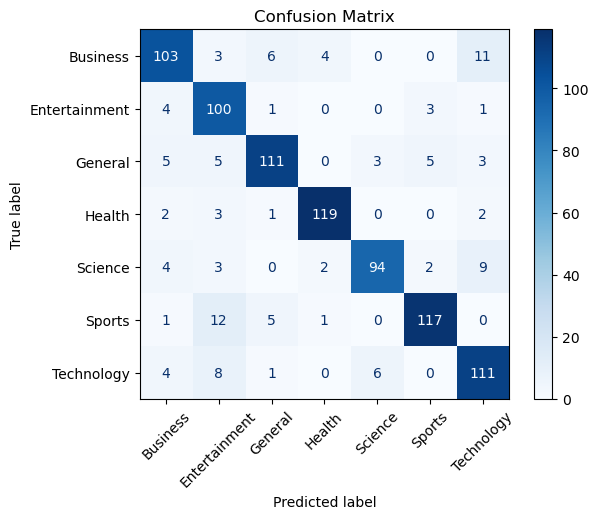

In [219]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xticks( np.arange(7), le.classes_, rotation=45 )
plt.yticks( np.arange(7), le.classes_ )
plt.show()